# ♻️ Waste Management Optimization
This notebook analyzes historical waste data to optimize waste management through clustering, forecasting, and facility performance evaluation.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA
from mlxtend.frequent_patterns import apriori, association_rules


In [6]:
df = pd.read_csv(r"C:\DS Project\waste_data.csv")
df.head()


,Date,Region,Facility,Organic,Plastic,Metal,Glass,Total_Waste,Recycled_Waste,Efficiency
0,2020-01-01,North,Plant D,197,82,97,63,439,197,0.67
1,2020-01-01,South,Plant D,277,144,96,67,584,203,0.79
2,2020-01-01,East,Plant B,289,140,94,101,624,410,0.73
3,2020-01-01,West,Plant C,100,190,74,52,416,179,0.83
4,2020-01-01,Central,Plant C,221,107,44,38,410,204,0.61


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.fillna(method='ffill', inplace=True)


C:\Users\ashis\AppData\Local\Temp\ipykernel_10996\2925380688.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


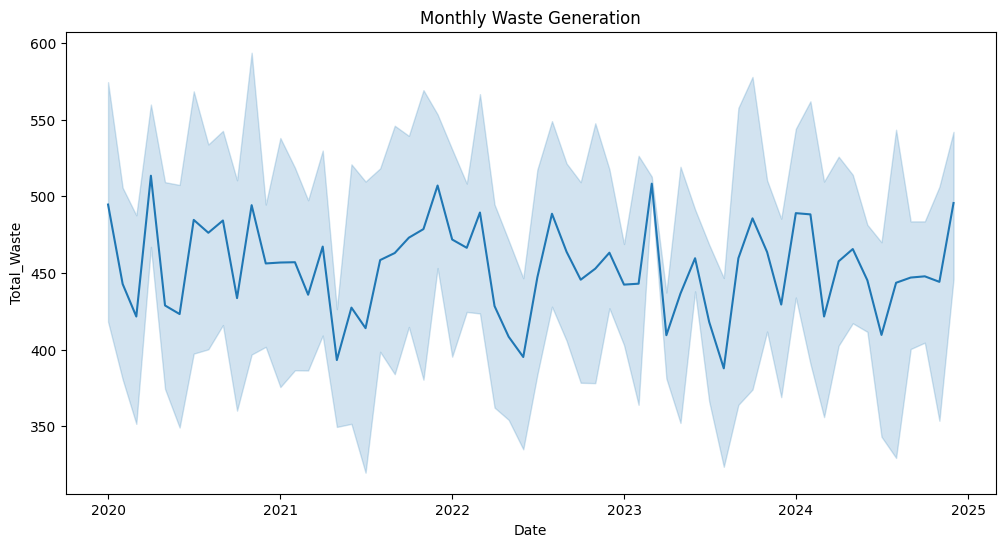

In [8]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Total_Waste')
plt.title("Monthly Waste Generation")
plt.show()


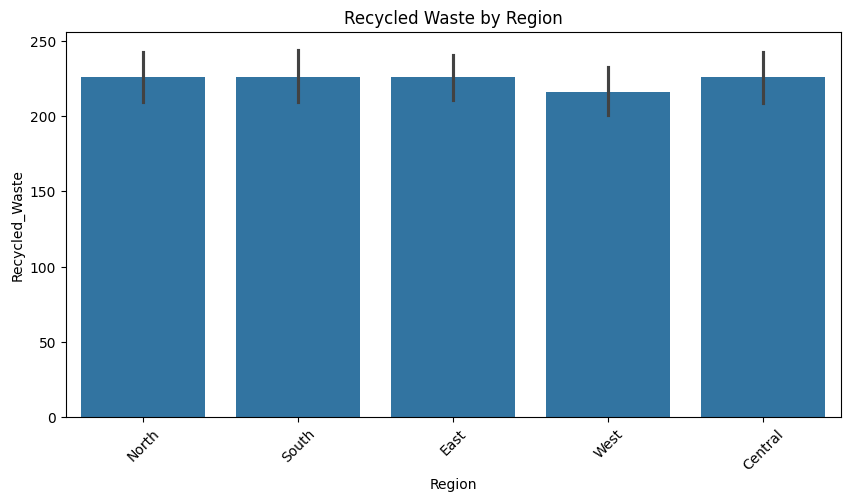

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Region', y='Recycled_Waste')
plt.xticks(rotation=45)
plt.title("Recycled Waste by Region")
plt.show()


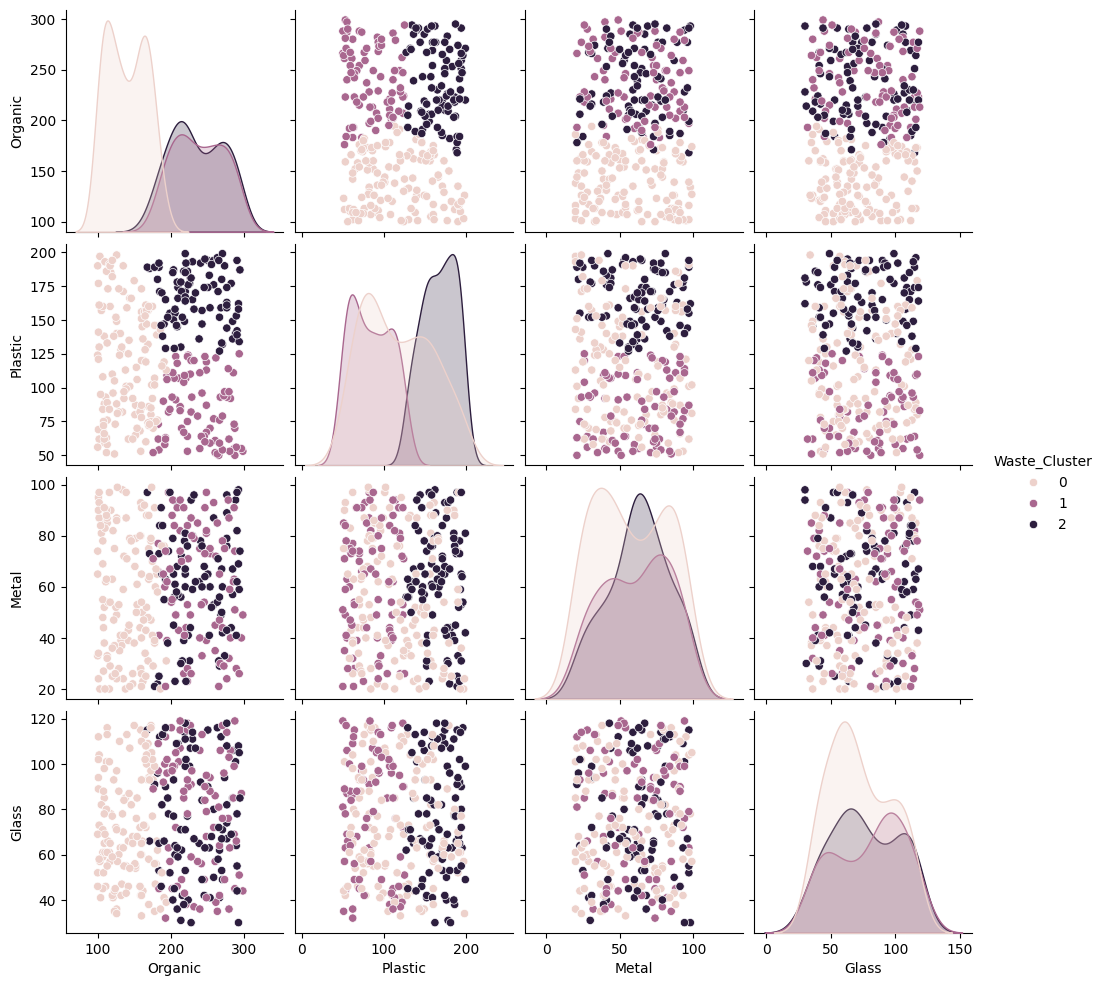

In [10]:
waste_cols = ['Organic', 'Plastic', 'Metal', 'Glass']
X = df[waste_cols]

kmeans = KMeans(n_clusters=3, random_state=42)
df['Waste_Cluster'] = kmeans.fit_predict(X)

sns.pairplot(df[waste_cols + ['Waste_Cluster']], hue='Waste_Cluster')


c:\Users\ashis\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ashis\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ashis\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Waste Generation Forecast')

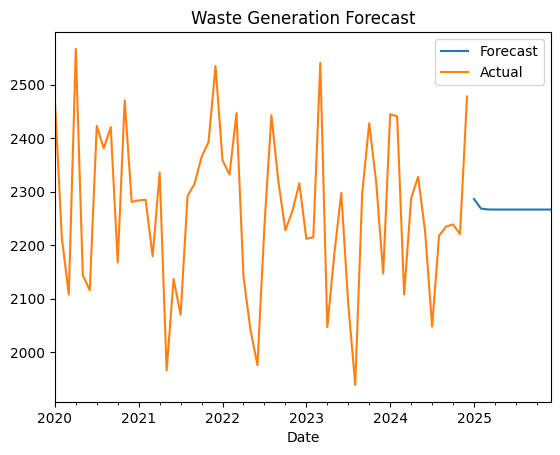

In [11]:
df_ts = df.groupby('Date')['Total_Waste'].sum()
model = ARIMA(df_ts, order=(1,1,1))
result = model.fit()
forecast = result.forecast(steps=12)

forecast.plot(label='Forecast')
df_ts.plot(label='Actual')
plt.legend()
plt.title("Waste Generation Forecast")


Text(0, 0.5, 'Average Values')

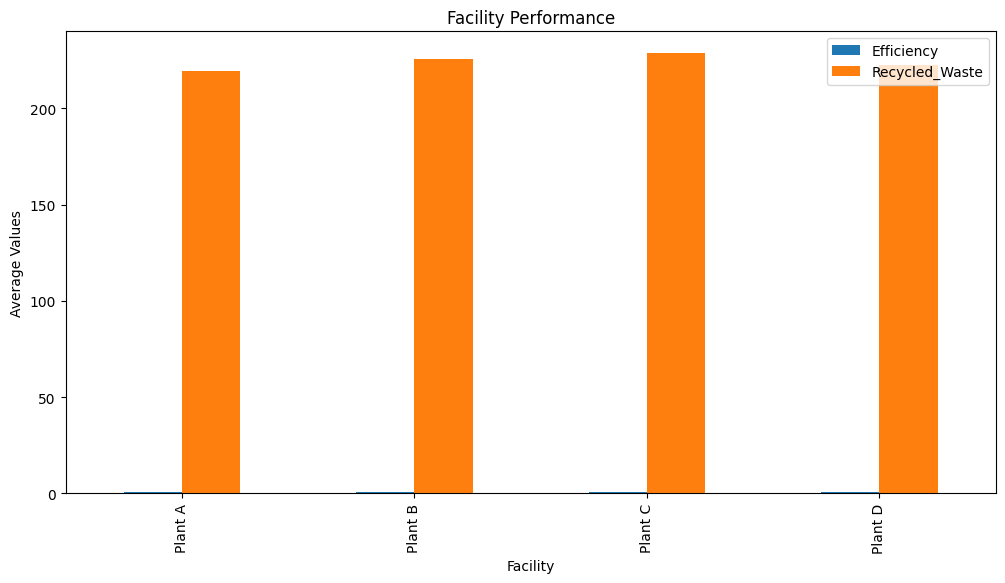

In [12]:
facility_metrics = df.groupby('Facility')[['Efficiency', 'Recycled_Waste']].mean()
facility_metrics.plot(kind='bar', figsize=(12,6))
plt.title("Facility Performance")
plt.ylabel("Average Values")


In [13]:
# Binarize data (example only - depends on dataset structure)
df_bin = df[['Organic', 'Plastic', 'Metal', 'Glass']] > 0

frequent_items = apriori(df_bin, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


c:\Users\ashis\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,support,confidence,lift
0,(Organic),(Plastic),1.0,1.0,1.0
1,(Plastic),(Organic),1.0,1.0,1.0
2,(Organic),(Metal),1.0,1.0,1.0
3,(Metal),(Organic),1.0,1.0,1.0
4,(Organic),(Glass),1.0,1.0,1.0
5,(Glass),(Organic),1.0,1.0,1.0
6,(Plastic),(Metal),1.0,1.0,1.0
7,(Metal),(Plastic),1.0,1.0,1.0
8,(Plastic),(Glass),1.0,1.0,1.0
9,(Glass),(Plastic),1.0,1.0,1.0


## Key Insights:
- Three waste clusters help categorize regions by waste type dominance.
- Forecasting shows an upward trend in waste generation.
- Some facilities underperform in recycling efficiency.
- Waste pattern mining offers opportunities for strategic reduction.

## Next Steps:
- Automate this pipeline using AzureML.
- Build a real-time dashboard using Streamlit.
